In [1]:
import os
import json

import numpy as np
import pandas as pd
import random

from PIL import Image
import matplotlib.pyplot as plt

import networkx as nx

## Load the Crypto Punks trading dataset

In [2]:
# Read the trading data json file
df = pd.read_json("Data/txn_history-2021-10-07.jsonl", lines=True)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [3]:
# Make a copy of the df
tx_history_df = df

In [4]:
# Fill "nan" values in the "eth" column with zeroes.
tx_history_df["eth"] = df["eth"].fillna(0)
tx_history_df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [5]:
# Drop unneeded columns
tx_history_df = tx_history_df.drop(columns=["type","accessories"])
tx_history_df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None


## Create a Data Table For the Unique Punk IDs and Relevant Features (Type, Accessories)

In [6]:
# Create a copy of the dataframe with only unique values for punk_id
# and the columns describing the characteristics of each individual
# Crypto_punk nft. 
temp_df = df
temp_df = temp_df.drop(columns=['txn_type', 'from', 'to', 'date', 'timestamp', 'source', 'eth', 'from_wallet_address', 'to_wallet_address'])

# Convert the 'type' object to string
temp_df['type'] = temp_df['type'].astype('str')
temp_df['accessories'] = temp_df['accessories'].astype('str')

# Remove the brackets from the 'type'
for row in range(len(temp_df)):
    
    type = temp_df.at[row,'type']
    # index each string to exclude the first two and last two 
    # characters (brackets and quotes)
    clean_type = type[2:-2]
    temp_df.at[row,'type'] = clean_type

crypto_punks_df = temp_df.drop_duplicates()
crypto_punks_df

,punk_id,type,accessories
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']"
41,1,Male,"['Smile', 'Mohawk']"
104,2,Female,['Wild Hair']
134,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']"
151,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']"
...,...,...,...
167357,9995,Female,"['Purple Eye Shadow', 'Straight Hair Dark']"
167364,9996,Male,"['Cigarette', 'Earring', 'Crazy Hair', 'Smile']"
167369,9997,Zombie,"['Front Beard', 'Cap Forward']"
167412,9998,Female,"['Wild White Hair', 'Black Lipstick', 'Clown E..."


In [7]:
# Reset the index to the same dataframe without adding a new column 
# for the old index information
crypto_punks_df.reset_index(drop=True, inplace=True)
crypto_punks_df

,punk_id,type,accessories
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']"
1,1,Male,"['Smile', 'Mohawk']"
2,2,Female,['Wild Hair']
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']"
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']"
...,...,...,...
9995,9995,Female,"['Purple Eye Shadow', 'Straight Hair Dark']"
9996,9996,Male,"['Cigarette', 'Earring', 'Crazy Hair', 'Smile']"
9997,9997,Zombie,"['Front Beard', 'Cap Forward']"
9998,9998,Female,"['Wild White Hair', 'Black Lipstick', 'Clown E..."


## Create a List of Dictionaries With the Image Bitmaps

In [8]:
# Create empty lists to store the machine learning and bitmap data
image_bitmap_list =[]

In [9]:
for i in range(10000):
    punk_id = i
    
    file_to_open = ("Data/images/"+str(i)+".png")
    rgb_image = Image.open(file_to_open)
    
    # Convert the image to a bitmap array
    rgb_bit_map = np.asarray(rgb_image)
    
    # Add the punk_id and bitmap array to the image_bitmap_list as
    # a dictionary
    image_bitmap_list.append({"punk_id": punk_id, 
                              "image_bitmap": rgb_bit_map
                             })

## Generate Visualizations for a Randomly Selected Punk_ID

Punk_ID:  1290
Type : Male
Accessories : ['Front Beard', 'Shaved Head']


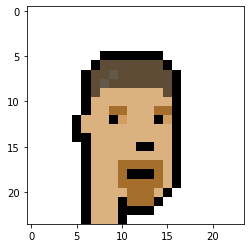

In [10]:
# Display a random image
index = random.randrange(0,len(image_bitmap_list),1)

#index = 3100

print("Punk_ID: ", image_bitmap_list[index]["punk_id"])
print("Type :", crypto_punks_df.loc[index,"type"])
print("Accessories :", crypto_punks_df.loc[index,"accessories"])
img = plt.imshow(image_bitmap_list[index]["image_bitmap"])

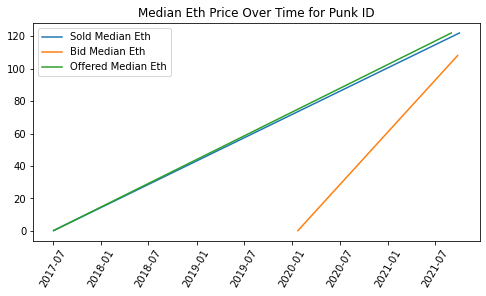

In [11]:
# Display transaction and price history
sold = tx_history_df[(tx_history_df.txn_type == 'Sold') & (tx_history_df.punk_id == index)].groupby("date").agg({"eth": ["median"]}).reset_index("date")
bid = tx_history_df[(tx_history_df.txn_type == 'Bid') & (tx_history_df.punk_id == index)].groupby("date").agg({"eth": ["median"]}).reset_index("date")
offered = tx_history_df[(tx_history_df.txn_type == 'Offered') & (tx_history_df.punk_id == index)].groupby("date").agg({"eth": ["median"]}).reset_index("date")

plt.figure(figsize=(8,4))
plt.plot(sold['date'], sold['eth']['median'], label="Sold Median Eth")
plt.plot(bid['date'], bid['eth']['median'], label="Bid Median Eth")
plt.plot(offered['date'], offered['eth']['median'], label="Offered Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price Over Time for Punk ID")
plt.show()

In [12]:
# Create a dataframe of deals for this Punk_ID
all_deals_df = tx_history_df[(tx_history_df["punk_id"]== index) & ((tx_history_df["txn_type"]=="Sold") | (tx_history_df["txn_type"]=="Transfer") | (tx_history_df["txn_type"]=="Bid") | (tx_history_df["txn_type"]=="Claimed") )]
all_deals_df = all_deals_df.sort_values(by="date")
all_deals_df

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
13945,Claimed,,Hemba,2017-06-23,2017-06-23 00:00:00,larvalabs,0.00,1290,None,None
13943,Sold,Hemba,0x00b278,2017-07-04,2017-07-04 00:00:00,larvalabs,0.25,1290,None,None
13942,Bid,ArmoredA…,,2020-01-23,2020-01-23 00:00:00,larvalabs,0.20,1290,None,None
13938,Bid,0xfe51c1,,2021-09-24,2021-09-24 00:00:00,opensea,108.00,1290,None,None
13940,Bid,0xfe51c1,,2021-09-24,2021-09-24 00:00:00,opensea,108.00,1290,None,None
13936,Sold,0x00b278,0xfe5ddf,2021-10-01,2021-10-01 01:15:06,opensea,121.90,1290,None,None


In [13]:
all_deals_df.reset_index(drop=False, inplace=True)
all_deals_df

,index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,13945,Claimed,,Hemba,2017-06-23,2017-06-23 00:00:00,larvalabs,0.00,1290,None,None
1,13943,Sold,Hemba,0x00b278,2017-07-04,2017-07-04 00:00:00,larvalabs,0.25,1290,None,None
2,13942,Bid,ArmoredA…,,2020-01-23,2020-01-23 00:00:00,larvalabs,0.20,1290,None,None
3,13938,Bid,0xfe51c1,,2021-09-24,2021-09-24 00:00:00,opensea,108.00,1290,None,None
4,13940,Bid,0xfe51c1,,2021-09-24,2021-09-24 00:00:00,opensea,108.00,1290,None,None
5,13936,Sold,0x00b278,0xfe5ddf,2021-10-01,2021-10-01 01:15:06,opensea,121.90,1290,None,None


In [14]:
deals_df = all_deals_df
for row in range(len(deals_df)):
    if deals_df.at[row,"from"] == "":
        deals_df.at[row,"from"] = "LarvaLabs"
    if (deals_df.at[row,"to"] == "") & (row >= 1):
        deals_df.at[row,"to"] = deals_df.at[row-1,"to"]
deals_df

,index,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address
0,13945,Claimed,LarvaLabs,Hemba,2017-06-23,2017-06-23 00:00:00,larvalabs,0.00,1290,None,None
1,13943,Sold,Hemba,0x00b278,2017-07-04,2017-07-04 00:00:00,larvalabs,0.25,1290,None,None
2,13942,Bid,ArmoredA…,0x00b278,2020-01-23,2020-01-23 00:00:00,larvalabs,0.20,1290,None,None
3,13938,Bid,0xfe51c1,0x00b278,2021-09-24,2021-09-24 00:00:00,opensea,108.00,1290,None,None
4,13940,Bid,0xfe51c1,0x00b278,2021-09-24,2021-09-24 00:00:00,opensea,108.00,1290,None,None
5,13936,Sold,0x00b278,0xfe5ddf,2021-10-01,2021-10-01 01:15:06,opensea,121.90,1290,None,None


<function matplotlib.pyplot.show(close=None, block=None)>

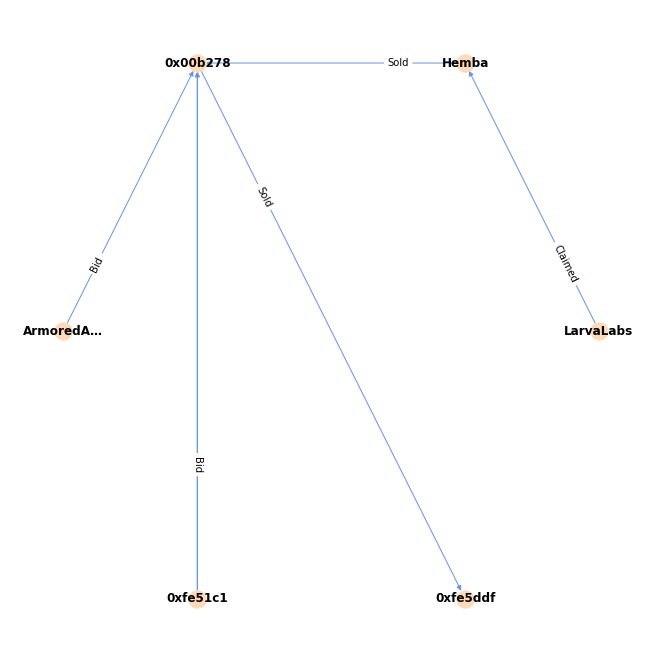

In [15]:
plt.figure(figsize=(9,9))

G = nx.MultiDiGraph()

# Create a empty dictionary for the edge labels
mylabels={}

color_dict = {"Sold": "green", "Transfer": "pink", "Bid": "orange", "Claimed": "yellow"}

for row in range(len(deals_df)):
    
    # Add to-from nodes
    G.add_node(deals_df.at[row,"from"])
    
    # Add edges to the nodes
    G.add_edge(deals_df.at[row,"from"],deals_df.at[row,"to"], color="red", weight=deals_df.at[row,"eth"], size=deals_df.at[row,"eth"])
    
    # Add the transaction type as edge label
    mylabels[deals_df.at[row,"from"],deals_df.at[row,"to"]]=deals_df.at[row,"txn_type"]


pos=nx.circular_layout(G)

nx.draw(G, pos, node_color='peachpuff', edge_color="cornflowerblue", with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, mylabels, label_pos=.75)

plt.show

## Create a Dataframe for Activity by Trader

In [16]:
# Make a copy of the transactions dataframe based on the "from" field
traders1_df = tx_history_df.drop(columns=["to","from_wallet_address","to_wallet_address"])
traders1_df

,txn_type,from,date,timestamp,source,eth,punk_id
0,Bid Withdrawn,0xe73a1d,2021-09-04,2021-09-04,larvalabs,321.00,0
1,Bid,0xe73a1d,2021-09-01,2021-09-01,larvalabs,321.00,0
2,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.00,0
3,Bid,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.00,0
4,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,263.00,0
...,...,...,...,...,...,...,...
167487,Bid,0xa0a59c,2017-07-03,2017-07-03,larvalabs,0.25,9999
167488,Bid,0x717403,2017-06-26,2017-06-26,larvalabs,0.20,9999
167489,Bid,ddaavvee,2017-06-23,2017-06-23,larvalabs,0.20,9999
167490,Bid,0x5b098b,2017-06-23,2017-06-23,larvalabs,0.15,9999


In [17]:
# drop rows with Nan's in "from"
traders1_df = traders1_df[traders1_df["from"] != ""]
traders1_df

,txn_type,from,date,timestamp,source,eth,punk_id
0,Bid Withdrawn,0xe73a1d,2021-09-04,2021-09-04,larvalabs,321.00,0
1,Bid,0xe73a1d,2021-09-01,2021-09-01,larvalabs,321.00,0
2,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.00,0
3,Bid,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.00,0
4,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,263.00,0
...,...,...,...,...,...,...,...
167486,Bid,0x7760e0,2017-07-03,2017-07-03,larvalabs,0.25,9999
167487,Bid,0xa0a59c,2017-07-03,2017-07-03,larvalabs,0.25,9999
167488,Bid,0x717403,2017-06-26,2017-06-26,larvalabs,0.20,9999
167489,Bid,ddaavvee,2017-06-23,2017-06-23,larvalabs,0.20,9999


In [18]:
# Rename "from" column
traders1_df.rename(columns = {'from':'trader_id'}, inplace = True)
traders1_df

/Users/ignacioguerra/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,txn_type,trader,date,timestamp,source,eth,punk_id
0,Bid Withdrawn,0xe73a1d,2021-09-04,2021-09-04,larvalabs,321.00,0
1,Bid,0xe73a1d,2021-09-01,2021-09-01,larvalabs,321.00,0
2,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.00,0
3,Bid,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.00,0
4,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,263.00,0
...,...,...,...,...,...,...,...
167486,Bid,0x7760e0,2017-07-03,2017-07-03,larvalabs,0.25,9999
167487,Bid,0xa0a59c,2017-07-03,2017-07-03,larvalabs,0.25,9999
167488,Bid,0x717403,2017-06-26,2017-06-26,larvalabs,0.20,9999
167489,Bid,ddaavvee,2017-06-23,2017-06-23,larvalabs,0.20,9999


In [19]:
# Inpsect the unique transaction types
traders1_df.txn_type.value_counts()

Bid                26808
Sold               18979
Bid Withdrawn      16342
Transfer           14225
(Wrap)              2773
(Unwrap)            2526
Offered             1526
Offer Withdrawn      469
Name: txn_type, dtype: int64

In [20]:
# Make a second copy of the transactions dataframe based on the "to" field
traders2_df = tx_history_df.drop(columns=["from","from_wallet_address","to_wallet_address"])
traders2_df

,txn_type,to,date,timestamp,source,eth,punk_id
0,Bid Withdrawn,,2021-09-04,2021-09-04,larvalabs,321.00,0
1,Bid,,2021-09-01,2021-09-01,larvalabs,321.00,0
2,Bid Withdrawn,,2021-09-01,2021-09-01,larvalabs,320.00,0
3,Bid,,2021-09-01,2021-09-01,larvalabs,320.00,0
4,Bid Withdrawn,,2021-09-01,2021-09-01,larvalabs,263.00,0
...,...,...,...,...,...,...,...
167487,Bid,,2017-07-03,2017-07-03,larvalabs,0.25,9999
167488,Bid,,2017-06-26,2017-06-26,larvalabs,0.20,9999
167489,Bid,,2017-06-23,2017-06-23,larvalabs,0.20,9999
167490,Bid,,2017-06-23,2017-06-23,larvalabs,0.15,9999


In [21]:
# drop rows with Nan's in "to"
traders2_df = traders2_df[traders2_df["to"] != ""]
traders2_df

,txn_type,to,date,timestamp,source,eth,punk_id
22,Sold,0xe08c32,2018-11-30,2018-11-30,larvalabs,25.00,0
29,Transfer,0xf5099e,2017-07-07,2017-07-07,larvalabs,0.00,0
30,Sold,0xa0a59c,2017-07-07,2017-07-07,larvalabs,1.60,0
37,Sold,0x00d7c9,2017-06-23,2017-06-23,larvalabs,0.98,0
40,Claimed,0xc352b5,2017-06-23,2017-06-23,larvalabs,0.00,0
...,...,...,...,...,...,...,...
167433,Sold,0xcfd9cc,2021-03-03,2021-03-03,larvalabs,38.00,9998
167437,Sold,TokenAng…,2020-12-27,2020-12-27,larvalabs,15.00,9998
167439,Claimed,cyberpnk…,2017-06-23,2017-06-23,larvalabs,0.00,9998
167457,Transfer,punk9999…,2017-07-19,2017-07-19,larvalabs,0.00,9999


In [22]:
# Rename "to" column
traders2_df.rename(columns = {'to':'trader_id'}, inplace = True)
traders2_df

/Users/ignacioguerra/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,txn_type,trader,date,timestamp,source,eth,punk_id
22,Sold,0xe08c32,2018-11-30,2018-11-30,larvalabs,25.00,0
29,Transfer,0xf5099e,2017-07-07,2017-07-07,larvalabs,0.00,0
30,Sold,0xa0a59c,2017-07-07,2017-07-07,larvalabs,1.60,0
37,Sold,0x00d7c9,2017-06-23,2017-06-23,larvalabs,0.98,0
40,Claimed,0xc352b5,2017-06-23,2017-06-23,larvalabs,0.00,0
...,...,...,...,...,...,...,...
167433,Sold,0xcfd9cc,2021-03-03,2021-03-03,larvalabs,38.00,9998
167437,Sold,TokenAng…,2020-12-27,2020-12-27,larvalabs,15.00,9998
167439,Claimed,cyberpnk…,2017-06-23,2017-06-23,larvalabs,0.00,9998
167457,Transfer,punk9999…,2017-07-19,2017-07-19,larvalabs,0.00,9999


In [23]:
# Inspect the unique transaction types
traders2_df.txn_type.value_counts()

Sold        18979
Transfer    13835
Claimed     10000
(Wrap)       2773
(Unwrap)     2526
Offered       765
Name: txn_type, dtype: int64

In [24]:
# Replace the transaction types to reflect counterparty view
traders2_df['txn_type'].replace(
    to_replace=['Sold','Transfer','Offered'], 
    value=['Purchased','Received','Offer Received'],
    inplace=True)
traders2_df

/Users/ignacioguerra/miniforge3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,txn_type,trader,date,timestamp,source,eth,punk_id
22,Purchased,0xe08c32,2018-11-30,2018-11-30,larvalabs,25.00,0
29,Received,0xf5099e,2017-07-07,2017-07-07,larvalabs,0.00,0
30,Purchased,0xa0a59c,2017-07-07,2017-07-07,larvalabs,1.60,0
37,Purchased,0x00d7c9,2017-06-23,2017-06-23,larvalabs,0.98,0
40,Claimed,0xc352b5,2017-06-23,2017-06-23,larvalabs,0.00,0
...,...,...,...,...,...,...,...
167433,Purchased,0xcfd9cc,2021-03-03,2021-03-03,larvalabs,38.00,9998
167437,Purchased,TokenAng…,2020-12-27,2020-12-27,larvalabs,15.00,9998
167439,Claimed,cyberpnk…,2017-06-23,2017-06-23,larvalabs,0.00,9998
167457,Received,punk9999…,2017-07-19,2017-07-19,larvalabs,0.00,9999


In [25]:
# Re-inspect the unique transaction types
traders2_df.txn_type.value_counts()

Purchased         18979
Received          13835
Claimed           10000
(Wrap)             2773
(Unwrap)           2526
Offer Received      765
Name: txn_type, dtype: int64

In [26]:
# Merge the two trader dataframes
traders_df = pd.concat([traders1_df,traders2_df])
traders_df

,txn_type,trader,date,timestamp,source,eth,punk_id
0,Bid Withdrawn,0xe73a1d,2021-09-04,2021-09-04,larvalabs,321.0,0
1,Bid,0xe73a1d,2021-09-01,2021-09-01,larvalabs,321.0,0
2,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.0,0
3,Bid,0x2e5e22,2021-09-01,2021-09-01,larvalabs,320.0,0
4,Bid Withdrawn,0x2e5e22,2021-09-01,2021-09-01,larvalabs,263.0,0
...,...,...,...,...,...,...,...
167433,Purchased,0xcfd9cc,2021-03-03,2021-03-03,larvalabs,38.0,9998
167437,Purchased,TokenAng…,2020-12-27,2020-12-27,larvalabs,15.0,9998
167439,Claimed,cyberpnk…,2017-06-23,2017-06-23,larvalabs,0.0,9998
167457,Received,punk9999…,2017-07-19,2017-07-19,larvalabs,0.0,9999


In [27]:
# Sort the dataframe by trader and date
traders_df = traders_df.sort_values(['trader_id', 'date'],
              ascending = [True, True])
traders_df

,txn_type,trader,date,timestamp,source,eth,punk_id
4950,Bid,007,2019-12-17,2019-12-17,larvalabs,0.10,521
4949,Bid Withdrawn,007,2020-01-02,2020-01-02,larvalabs,0.10,521
126547,Purchased,007,2020-04-07,2020-04-07,larvalabs,0.70,7750
126545,Sold,007,2020-04-08,2020-04-08,larvalabs,0.85,7750
160412,Bid,0age.eth,2021-06-09,2021-06-09,larvalabs,12.34,9626
...,...,...,...,...,...,...,...
118768,Bid,🤹🏻‍♂.e…,2021-09-07,2021-09-07,larvalabs,89.00,7334
118764,Bid Withdrawn,🤹🏻‍♂.e…,2021-09-08,2021-09-08,larvalabs,111.00,7334
118765,Bid,🤹🏻‍♂.e…,2021-09-08,2021-09-08,larvalabs,111.00,7334
51870,Purchased,🦊🦄👩‍?…,2021-07-31,2021-07-31,larvalabs,32.00,3520


In [28]:
# Reset the index
traders_df.reset_index(drop=False, inplace=True)
traders_df

,index,txn_type,trader,date,timestamp,source,eth,punk_id
0,4950,Bid,007,2019-12-17,2019-12-17,larvalabs,0.10,521
1,4949,Bid Withdrawn,007,2020-01-02,2020-01-02,larvalabs,0.10,521
2,126547,Purchased,007,2020-04-07,2020-04-07,larvalabs,0.70,7750
3,126545,Sold,007,2020-04-08,2020-04-08,larvalabs,0.85,7750
4,160412,Bid,0age.eth,2021-06-09,2021-06-09,larvalabs,12.34,9626
...,...,...,...,...,...,...,...,...
132521,118768,Bid,🤹🏻‍♂.e…,2021-09-07,2021-09-07,larvalabs,89.00,7334
132522,118764,Bid Withdrawn,🤹🏻‍♂.e…,2021-09-08,2021-09-08,larvalabs,111.00,7334
132523,118765,Bid,🤹🏻‍♂.e…,2021-09-08,2021-09-08,larvalabs,111.00,7334
132524,51870,Purchased,🦊🦄👩‍?…,2021-07-31,2021-07-31,larvalabs,32.00,3520


In [29]:
# Reorder the columns
traders_df = traders_df[['index', 'trader_id', 'txn_type', 'punk_id', 'eth', 'date','timestamp','source']]
traders_df

,index,trader,txn_type,punk_id,eth,date,timestamp,source
0,4950,007,Bid,521,0.10,2019-12-17,2019-12-17,larvalabs
1,4949,007,Bid Withdrawn,521,0.10,2020-01-02,2020-01-02,larvalabs
2,126547,007,Purchased,7750,0.70,2020-04-07,2020-04-07,larvalabs
3,126545,007,Sold,7750,0.85,2020-04-08,2020-04-08,larvalabs
4,160412,0age.eth,Bid,9626,12.34,2021-06-09,2021-06-09,larvalabs
...,...,...,...,...,...,...,...,...
132521,118768,🤹🏻‍♂.e…,Bid,7334,89.00,2021-09-07,2021-09-07,larvalabs
132522,118764,🤹🏻‍♂.e…,Bid Withdrawn,7334,111.00,2021-09-08,2021-09-08,larvalabs
132523,118765,🤹🏻‍♂.e…,Bid,7334,111.00,2021-09-08,2021-09-08,larvalabs
132524,51870,🦊🦄👩‍?…,Purchased,3520,32.00,2021-07-31,2021-07-31,larvalabs


In [30]:
# Traders sorted by activity
sorted_traders_df = pd.DataFrame(traders_df.groupby(["trader_id"])['txn_type'].count())
sorted_traders_df = sorted_traders_df.sort_values(['txn_type'], ascending = False)
sorted_traders_df.reset_index(drop=False, inplace=True)
sorted_traders_df

,trader,txn_type
0,WrappedC…,5299
1,Pranksy,2896
2,Hemba,2413
3,0x717403,2336
4,0x00d7c9,2158
...,...,...
8469,0xc36efb,1
8470,0x3edd84,1
8471,0xc399f6,1
8472,ObiWanKe…,1


## Get Punk_IDs followed by this Trader

In [31]:
# Pick a random trader
pick_index = random.randrange(0,len(sorted_traders_df),1)
pick = sorted_traders_df.at[pick_index,"trader_id"]

#pick = "0x7b8961"

pick_df = traders_df[traders_df["trader_id"] == pick]

# View trader's activity
pick_df

,index,trader,txn_type,punk_id,eth,date,timestamp,source
8607,35251,0x0d5e0b,Bid,2620,0.01,2021-06-24,2021-06-24,larvalabs


In [32]:
# Summarized activity by Punk_IDs
print("Punk_IDs followed by trader: ",pick)
pick_summary = pd.DataFrame(pick_df.groupby(["punk_id"])['txn_type'].count())
pick_summary.rename(columns = {'txn_type':'actions'}, inplace = True)
pick_summary.sort_values(['actions'],
              ascending = False)
pick_summary.reset_index(drop=False, inplace=True)
pick_summary

Punk_IDs followed by trader:  0x0d5e0b


,punk_id,actions
0,2620,1


Punk_ID:  2620
Type : Male
Accessories : ['Wild Hair', 'Normal Beard', '3D Glasses']


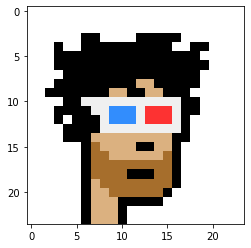

In [33]:
# View images of followed punk_ids
for row in range(len(pick_summary)):
    index = pick_summary.at[row,"punk_id"]
    print("Punk_ID: ", image_bitmap_list[index]["punk_id"])
    print("Type :", crypto_punks_df.loc[index,"type"])
    print("Accessories :", crypto_punks_df.loc[index,"accessories"])
    img = plt.imshow(image_bitmap_list[index]["image_bitmap"])
    

In [34]:
# create plot
plt.figure(0, figsize=(12,25))

# Initialize variables
cpt = 0
pic_size = 24

# Loop for each row to plot
for n in range(7):

    # Loop for each column to plot
    for i in range(1,6):
        cpt=cpt + 1
        plt.subplot(7,5,cpt)
        
        # Select a random punk image and add it to the plot
        for index in range(len(pick_summary)):
            
        id = random.randint(0,9999)
        file_to_load = ("Data/images/"+str(id)+".png")
        punk_image = Image.open(file_to_load)
        plt.imshow(punk_image)
        plt.title("punk_id "+str(id))
        punk_type = crypto_punks_df.loc[crypto_punks_df["punk_id"] == id,"type"].iloc[0]
        punk_accessories = crypto_punks_df.loc[crypto_punks_df["punk_id"] == id,"accessories"].iloc[0]
        wrapped_label = punk_type+"\n"+("\n".join(wrap(punk_accessories,20)))
        plt.xlabel(wrapped_label)
        
# Show the plotted images   
plt.tight_layout()
plt.show

IndentationError: expected an indented block (736038450.py, line 19)